# conductance based models and their reductions

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

from cycler import cycler
from scipy.integrate import odeint

palette = sns.color_palette("Set2")
plt.rc('axes', prop_cycle=cycler(color=palette))
plt.style.use(['science', 'grid', 'custom'])

# minimal models

<br>minimal models can help capture some of the dynamics of more complex systems but CANNOT provide exhaustive information about all electrophysiological models

<br>for example, understanding the dynamics of $y = x$ and $y = x^{2}$ does not provide complete information about $y = x + x^{2}$

<br>there are 6 minimal models, which reveal the uses of dynamical systems theory in situations where intuition and common sense fail

<br>

## persistent sodium plus potassium model ($I_{\text{Na}} + I_{\text{K}}$)
<br>
$$
\begin{gather}
C\dot{V} = I - \overbrace{g_{\text{L}}(V - E_{\text{L}})}^{\text{leak current}} - \overbrace{g_{\text{Na}}m(V - E_{\text{Na}})}^{\text{persistent sodium current}} - \overbrace{g_{\text{K}}n(V - E_{\text{K}})}^{\text{potassium current}} \\ \\ \\
\dot{m} = \frac{m_{\infty}(V) - m}{\tau_{m}(V)} \\ \\
\dot{n} = \frac{m_{\infty}(V) - n}{\tau_{n}(V)}
\end{gather}
$$


In [4]:
C = 1.0
I = 0.0

E_L_high = -80.0 #mV
E_L_low = -78 #mV
g_L = 8.0 # mS/cm^2

E_Na = 60.0 # mV
g_Na = 20.0 # mS/cm^2

E_K = -90.0 # mV
g_K = 10.0 # mS/cm^2

tau = 1.0 # ms

def boltzmann(V, V_half, k):
    return 1 / (1 + np.exp((V_half - V) / k))

m_inf = lambda V : boltzmann(V, -20.0, 15.0)
n_inf_high = lambda V : boltzmann(V, -25.0, 5.0)
n_inf_low = lambda V : boltzmann(V, -45.0, 5.0)

def dV_high(V, n, I):
    return (I - g_L*(V - E_L_high) - g_Na*m_inf(V)*(V - E_Na) - g_K*n*(V - E_K)) / C

def dn_high(V, n):
    return (n_inf_high(V) - n) / tau

def dV_low(V, n, I):
    return (I - g_L*(V - E_L_low) - g_Na*m_inf(V)*(V - E_Na) - g_K*n*(V - E_K)) / C

def dn_low(V, n):
    return (n_inf_low(V) - n) / tau

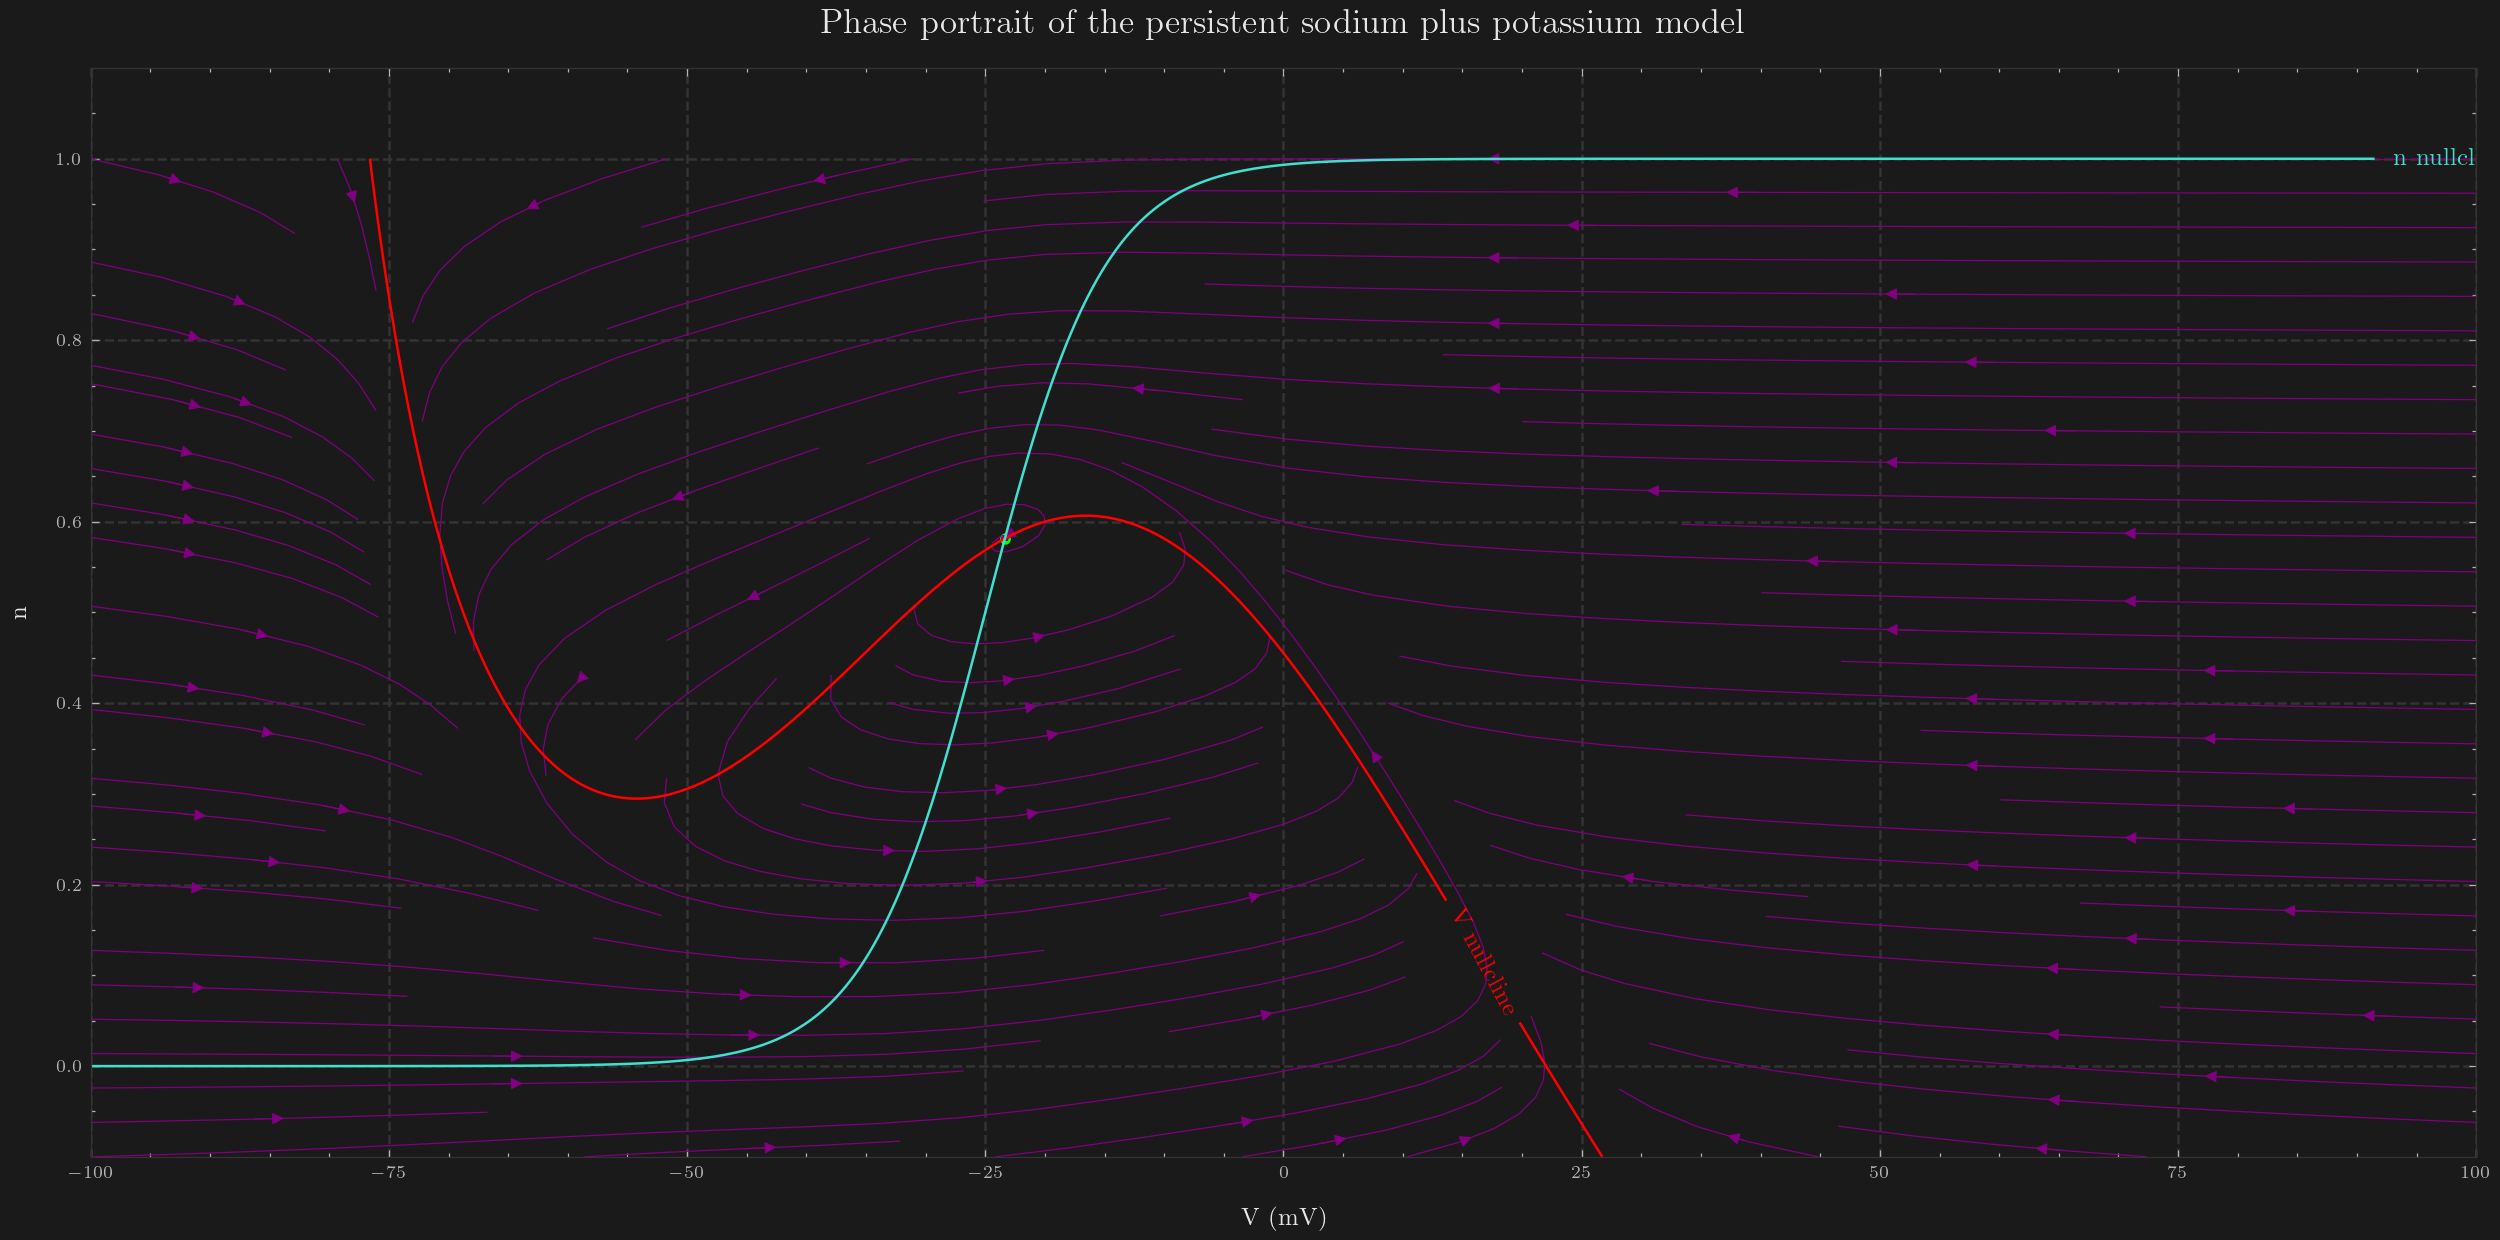

(2, 2)

In [47]:
V = np.linspace(-100, 100, 5000)
n = np.linspace(-0.1, 1, 5000)
t = np.linspace(0, 100, 5000)

I = 100.0

V_grid, n_grid = np.meshgrid(V, n)

dV_high_grid = dV_high(V_grid, n_grid, I)
dn_high_grid = dn_high(V_grid, n_grid)

equilibrium_indices = np.argwhere((np.abs(dV_high_grid) < 0.1) & (np.abs(dn_high_grid) < 0.001))

V_eq_points = V_grid[equilibrium_indices[:, 0], equilibrium_indices[:, 1]]
n_eq_points = n_grid[equilibrium_indices[:, 0], equilibrium_indices[:, 1]]

equilibrium_points = np.column_stack((V_eq_points, n_eq_points))

plt.figure(figsize=(14, 7))

plt.streamplot(V, n, dV_high_grid, dn_high_grid, color='purple', linewidth=0.5)

V_nullcline = plt.contour(V, n, dV_high_grid, levels=0, colors='r')
n_nullcline = plt.contour(V, n, dn_high_grid, levels=0, colors='turquoise')

plt.clabel(V_nullcline, fmt={0: 'V nullcline'}, inline=True, fontsize=10)
plt.clabel(n_nullcline, fmt={0: 'n nullcline'}, inline=True, fontsize=10)

plt.scatter(equilibrium_points[:,0], equilibrium_points[:,1], color='lime', s=10)    

plt.xlabel('V (mV)')
plt.ylabel('n')
plt.ylim(-0.1,1.1)

plt.title('Phase portrait of the persistent sodium plus potassium model')

plt.tight_layout()

plt.show()

# transient sodium model ($I_{\text{Na,t}}$)
<br>
$$
\begin{gather}
C\dot{V} = I - \overbrace{g_{\text{L}}(V - E_{\text{L}})}^{\text{leak current}} - \overbrace{g_{\text{Na}}m_{\infty}^{3}(V)h(V - E_{\text{Na}})}^{\text{transient sodium current}} \\ \\
\dot{h} = \frac{h_{\infty}(V) - h}{\tau_{h}(V)}
\end{gather}
$$

In [112]:
# parameters as in hodgkin-huxley model except for those from figure 5.6, page 135

C = 1.0

tau_h = 5.0 # ms

E_L = -70.0 #mV
g_L = 1.0 # mS/cm^2

E_Na = 60.0 # mV
g_Na = 10.0 # mS/cm^2

m_inf = lambda V: boltzmann(V, -40.0, 15)
h_inf = lambda V: boltzmann(V, -42.0, -7)

def dV(V, h, I):
    return (I - g_L*(V - E_L) - g_Na*(m_inf(V)**3)*h*(V - E_Na)) / C

def dh(V, h):
    return (h_inf(V) - h) / tau_h

def I(V):
    return g_L*(V - E_L) + g_Na*(m_inf(V)**3)*h_inf(V)*(V - E_Na)

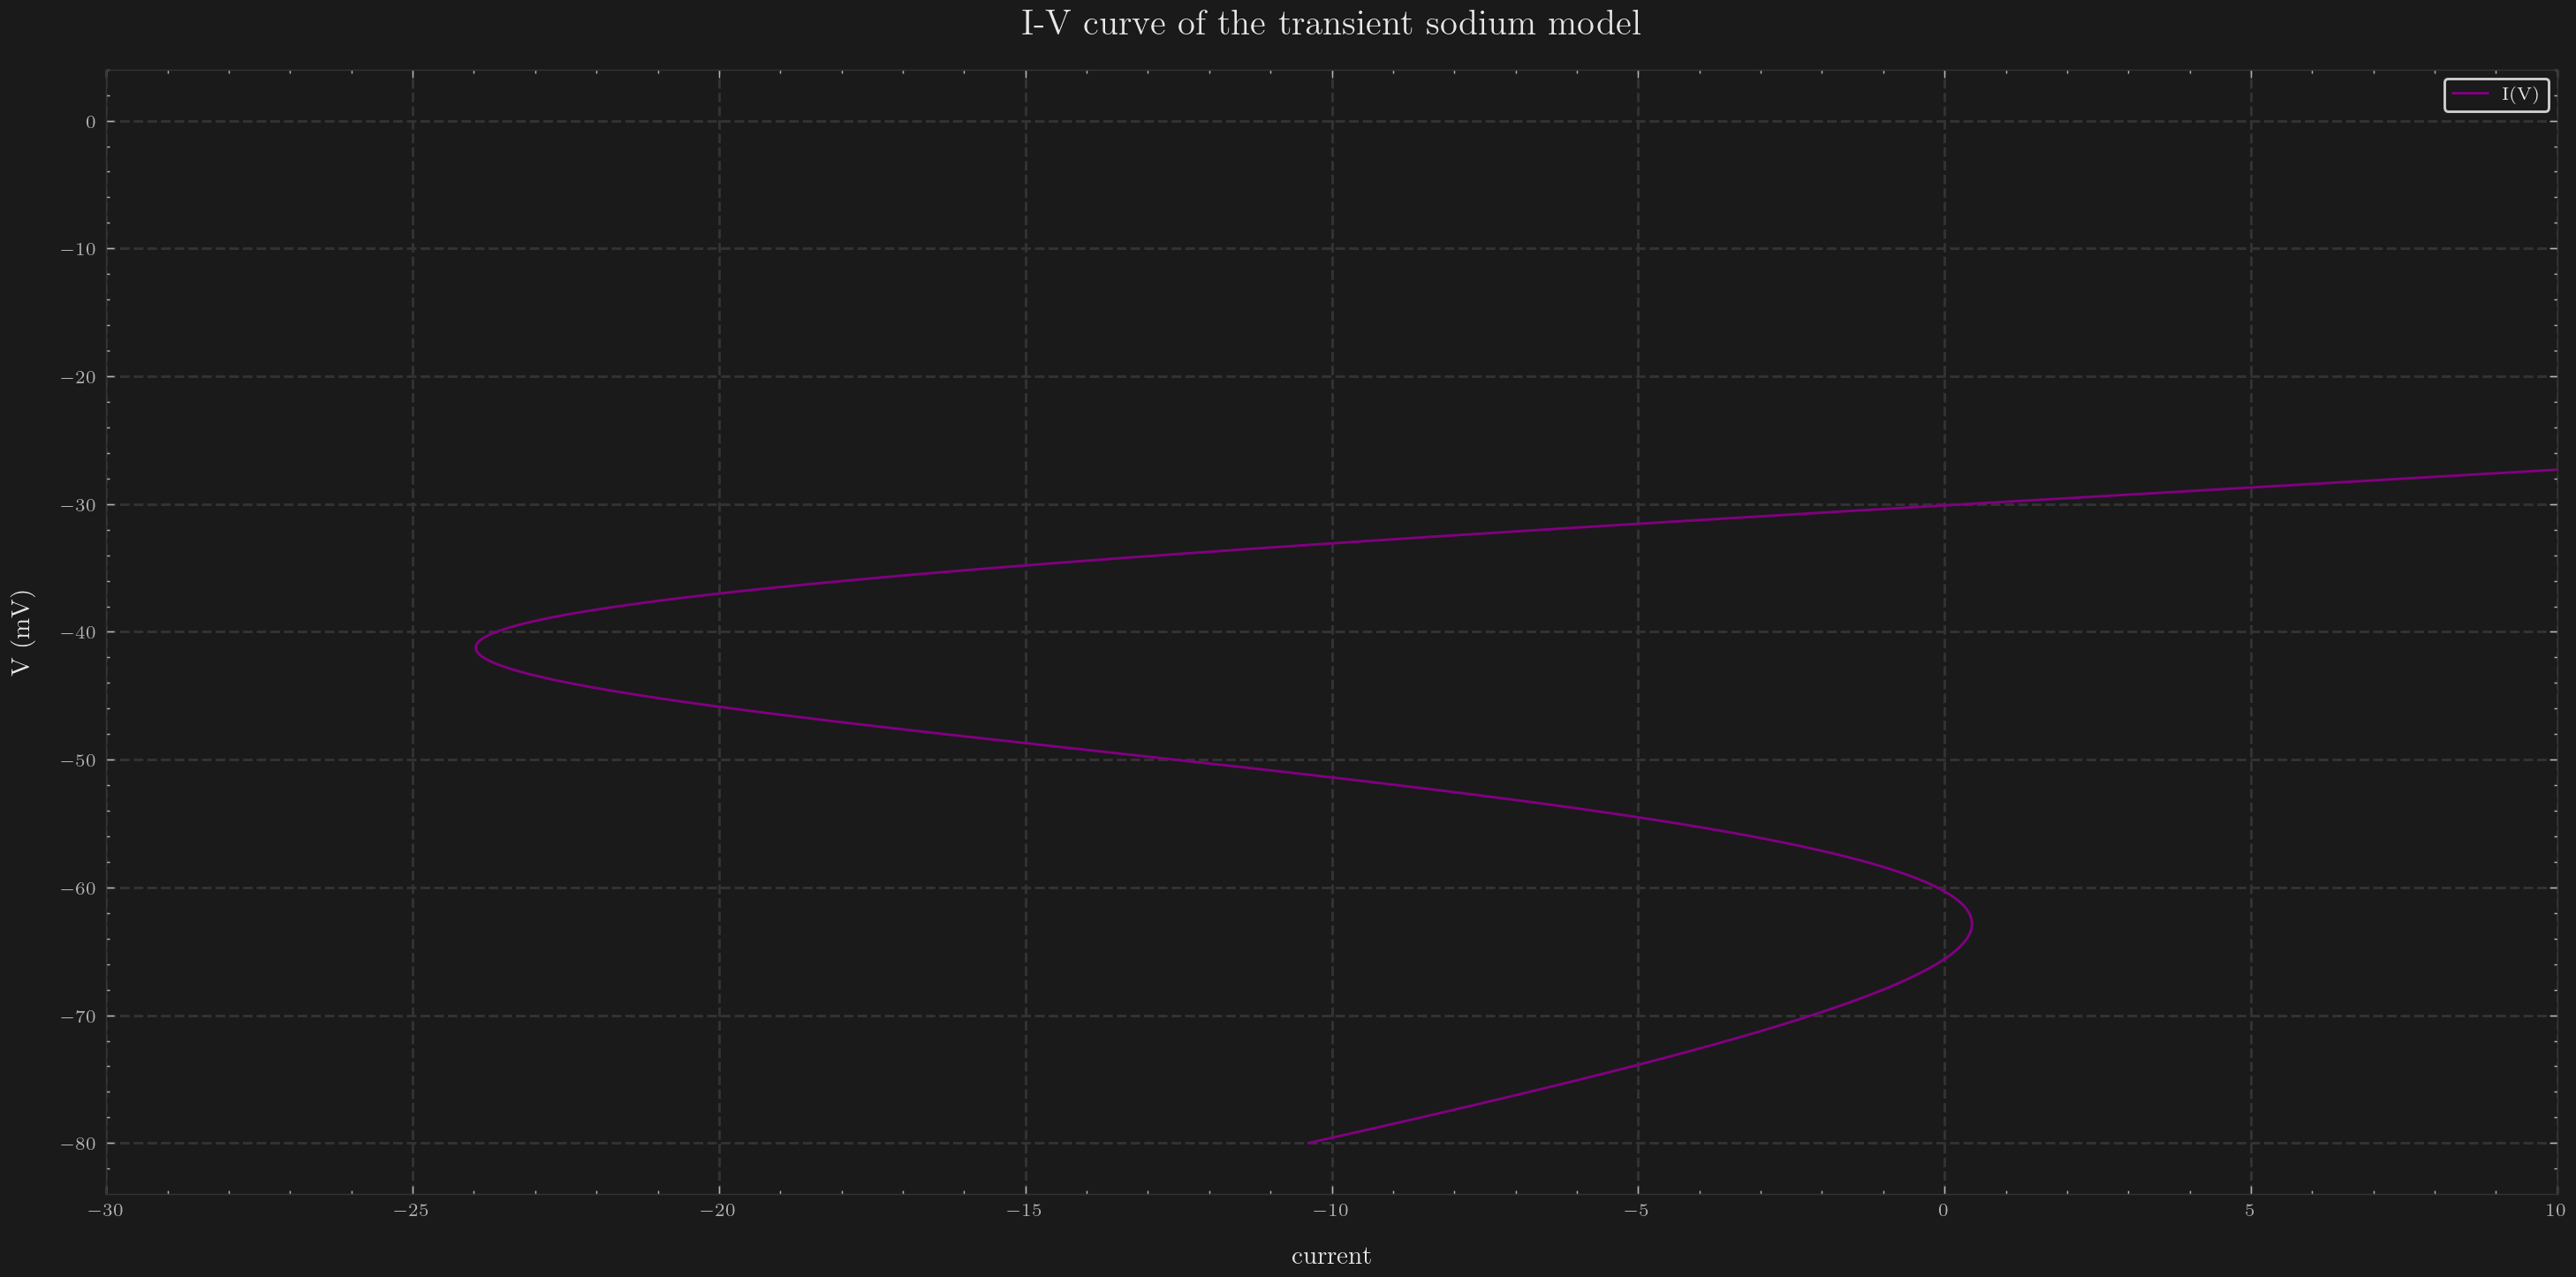

In [113]:
V = np.linspace(-80, 0, 1000)

currents = I(V)

plt.figure(figsize=(14, 7), dpi = 210)
plt.plot(currents, V, label='I(V)', color='purple')
plt.title('I-V curve of the transient sodium model')
plt.xlabel('current')
plt.ylabel('V (mV)')

plt.xlim(-30, 10)

plt.tight_layout()
plt.legend()